## Make phage gene sharing clustermap based on Orthofinder output
### Using output 'Orthogroups.tsv' from Orthofinder v3.0.1(https://github.com/davidemms/OrthoFinder)

In [65]:
import pandas as pd
from pypalettes import load_cmap
from matplotlib.patches import Patch
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
orthogroups = pd.read_csv('orthogroup_files/Orthogroups.tsv',sep='\t',index_col=0).drop(['slick_unified'],axis=1)

In [73]:
frac_shared_orthogroups = pd.DataFrame(index = orthogroups.columns.values, columns = orthogroups.columns.values,dtype=float)
for group1 in orthogroups.columns.values:
    for group2 in orthogroups.columns.values:
        shared = len(orthogroups[(~orthogroups[group1].isna()) & (~orthogroups[group2].isna())].index.values)
        av_groups = ((614 - orthogroups[group1].isna().sum()) + (614 - orthogroups[group2].isna().sum()))/2
        frac_shared_orthogroups.loc[group1,group2] = (shared/av_groups).astype(float)

In [74]:
genome_groups = pd.read_csv('orthogroup_files/genome_type.csv',header=0,index_col=0)
hex_colors = load_cmap("Ofrenda").hex
match_palette = {'Cyanophage':hex_colors[1],'Diazotroph phage':'#311E13','Trichodesmium phage':'#000000'}
genome_groups.loc[:,'color'] = genome_groups['Type'].map(match_palette)
index_dict['Trichodesmium phage NPSG.1'] = 'T.NPSG.1'
handles = []
handles.append(Patch(color='#FFFFFF00',label='Virus group'))
for i in match_palette.keys():
    handles.append(Patch(color=match_palette[i],label=i))

In [79]:
frac_shared_orthogroups = frac_shared_orthogroups.rename(index=genome_groups['Short'],columns=genome_groups['Short'])
genome_groups = genome_groups.set_index('Short')

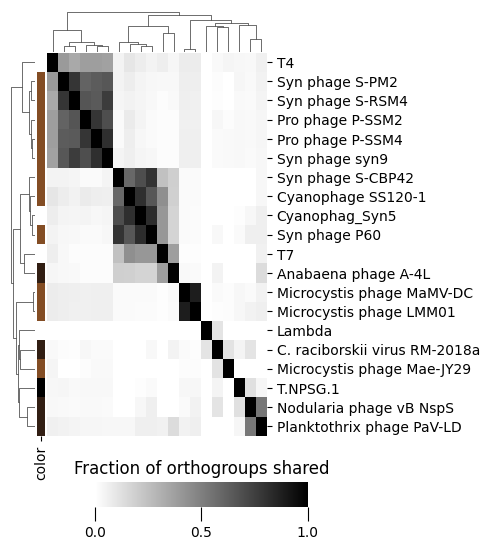

In [82]:
kws = dict(cbar_kws=dict(ticks=[0, 0.50, 1], orientation='horizontal'), figsize=(5,5))
g = sns.clustermap(frac_shared_orthogroups,robust=True,xticklabels=False,row_colors = genome_groups['color'],cmap='binary',dendrogram_ratio=0.1,**kws)
ax = g.ax_heatmap
ax.set_ylabel("")
g.ax_cbar.set_position([.2, -.025, .425, 0.05])
g.ax_cbar.set_title('Fraction of orthogroups shared')
g.ax_cbar.tick_params(axis='x', length=10)
#plt.legend(handles=handles, bbox_to_anchor=(0,21), loc="upper left", fontsize=9)
#plt.savefig('output_figures/fig1b_gene_sharing_cluster.svg',bbox_inches='tight',transparent=True)